![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: Mais bisseção

Vamos continuar estudando o método de bisseção, agora com garantias de erros absolutos e relativos ao mesmo tempo.

## Questão 1: uma função auxiliar

Quando a bisseção retorna uma "raiz", ela dá o ponto médio de um intervalo $[a,b]$, onde temos certeza que há uma raiz de $f$.

Escreva uma função `absrel(a,b)` que, dado um intervalo $[a,b]$, retorna o maior erro absoluto e o maior erro relativo que pode ocorrer ao considerar que a raiz é o ponto médio deste intervalo.

In [7]:
import numpy as np
from numpy import infty

In [5]:
def absrel(a,b):
    m=(a+b)/2
    eAbs=max(abs(a-m), abs(b-m))
    eRel=max(abs(a-m)/a,abs(b-m)/b)
    if a*b<0:
        return eAbs,+infty
    else:
        return eAbs,eRel

In [8]:
absrel(-2,1)

(1.5, inf)

In [3]:
assert absrel(1,2) == (.5, .5)
assert absrel(10,11) == (0.5, 0.05)

In [44]:
assert absrel(-2,1) == (1.5, +infty)

Porquê o erro relativo do intervalo $[-2,1]$ é infinito?

Porquê o 0 pertence ao intervalo considerado.

## Questão 2: Outros retornos na bisseção

Modifique o método da bisseção para terminar quando o erro absoluto **e** o erro relativo
forem menores do que (ou iguais às) tolerâncias dadas em argumento.

Retorne uma tripla contendo, nesta ordem:
- uma estimativa para a raiz $z$,
- uma estimativa para o erro absoluto $e_{abs}$,
- uma estimativa para o erro relativo $e_{rel}$.

In [96]:
def bissecao(f, a, b, abstol=1e-10, reltol=1e-10):
    """ Escreva uma documentação para explicar como este método funciona,
        qual o significado dos valores de entrada e dos de retorno. """
    lista=[]
    m=(a+b)/2
    z=m
    eAbs=abs(f(m)-z)
    eRel=abs(f(m)-z)/f(m)
    if a==b and f(m)!=0:
        print("Escolha um intervalo melhor!")
    else:
        while f(a)*f(b)<0 and eAbs<=abstol and abs(eRel)<=reltol:
                z1=(a+m)/2
                m=z1
                z2=(b+z1)/2
                a=z1
                b=z2
                z=min(z1,z2)
                lista.append(z)
        return z,eAbs,eRel
def lista(f, a, b, abstol=1e-10, reltol=1e-10):
    """ Escreva uma documentação para explicar como este método funciona,
        qual o significado dos valores de entrada e dos de retorno. """
    m=(a+b)/2
    z=m
    eAbs=abs(f(m)-z)
    eRel=abs(f(m)-z)/f(m)
    if a==b and f(m)!=0:
        print("Escolha um intervalo melhor!")
    else:
        while eAbs<=abstol and abs(eRel)<=reltol:
            if f(a)*f(b)<0:
                lista=[]
                z1=(a+m)/2
                m=z1
                z2=(b+z1)/2
                a=z1
                b=z2
                z=min(z1,z2)
            return lista

In [97]:
import matplotlib.pyplot as plt
def f(x):
    
    return np.cos(x)

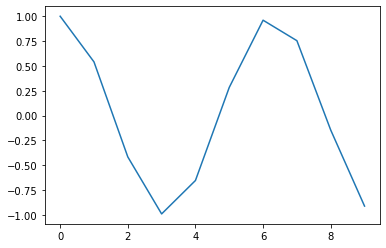

In [92]:
x=range(10)
y=[f(k) for k in x]
plt.plot(x, y)
plt.show()

In [98]:
lista(f,1,5)

Não se preocupe em obter valores iguais para as cotas superiores dos erros absoluto e relativo.

O importante é que estas estimativas sejam **coerentes** com os requisitos do método da bisseção:

- o erro absoluto real (ou seja, a diferença entre a raiz certa e a raiz calculada) deve ser menor do que a estimativa do erro absoluto,
- o erro relativo real deve ser menor do que a estimativa do erro relativo.

Note que é exatamente isso que vai ser testado em seguida!

In [99]:
bissecao(np.cos, 1,5)

(3.0, 3.989992496600445, -4.030325997723981)

In [66]:
x,err,rel = bissecao(np.sin,1,5)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
assert abs(x - np.pi)/np.pi < rel
assert abs(x - np.pi) < err

In [68]:
# Testando que sai pela razão certa
assert rel < 1e-10
assert err < 1e-10

AssertionError: 

In [64]:
def f(x):
    return ((x**2 - 2)**2 - 2)**2 - 2 - x

In [54]:
x,err,rel = bissecao(f,1.4,1.6,reltol=1e-12)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
v = 1.532088886238
assert abs(x - v)/v < rel
assert abs(x - v) < err

In [ ]:
# Testando que sai pela razão certa
assert err < 1e-10
assert rel < 1e-12

## Questão 3: extremidades da bisseção

Modifique a sua implementação da bisseção para retornar uma lista com os intervalos considerados,
em ordem decrescente.

In [ ]:
def bissecao_extremidades(f,a,b, abstol=1e-10,reltol=1e-10):
    """ Escreva a documentação. """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Vendo alguns dos intervalos iniciais
l = bissecao_extremidades(np.sin,1,5)
for I in l[:5]:
    print(I)

In [ ]:
lista_intervalos = bissecao_extremidades(np.sin,100,103)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-10
assert 35 <= len(lista_intervalos) <= 40

In [ ]:
lista_intervalos = bissecao_extremidades(np.sin,100,103, abstol=1e-12, reltol=1e-12)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-12
assert abs(af - 32*np.pi) <= 2e-12
assert abs(bf - 32*np.pi) <= 2e-12
assert 40 <= len(lista_intervalos) <= 45

In [ ]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

v = -0.4450418679126287
assert(abs(x - v)/v < 1e-12)
assert(abs(x - v) < 1e-8)

In [ ]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

assert 40 <= len(lista_intervalos) <= 45

## Questão 4: Gráficos

Faça o gráfico do tamanho dos intervalos, em função do número de iterações,
para a bisseção do cosseno entre 0 e 3, com as tolerâncias padrão.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
a, b = 0, 3

# YOUR CODE HERE
raise NotImplementedError()

# Não apague a linha abaixo, ela faz os assert's dos gráficos darem certo
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1
assert len(ax.get_title()) >= 10

In [ ]:
linha = ax.lines[0]
assert 5e-11 < min(linha.get_ydata()) < 2e-10
assert max(linha.get_ydata()) == 3

Agora, faça um gráfico com
- o comprimento dos intervalos
- a distância entre a extremidade inferior e a raiz correta
- a distância entre a extremidade superior e a raiz correta

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

Repita o gráfico acima para o polinômio $f$ acima, com tolerância `1e-13`, tanto absoluta como relativa.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [ ]:
for l in ax.lines:
    assert 40 <= len(l.get_xdata()) <= 45

O que você observa de comum nos gráficos com relação aos erros entre as extremidades dos intervalos?

YOUR ANSWER HERE